## Observations and Insights 

Observations:

1. Capomulin and Ramicane are the most effective treatment regimens based on how long the mice survived and the size of tumor volumes for the mice on those 2 regimens.

2. Infubinol and Ceftamin had more varied results with tumor volume being more spread out.

3. There is a very clear correlation between mouse weight and tumor volume. The heavier the mouse the larger the tumor size.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
merged_df.nunique(axis=0)


Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]


mouse_index_df = duplicate_mice_df.set_index("Mouse ID")

mouse_index_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']

# Ensuring duplicate Mouse ID was dropped using number of unique function.
clean_df.nunique(axis=0)

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
grouped_by_regimen = clean_df.groupby('Drug Regimen')

#set mean, median, variance, and standard deviation variables
mean_volume = grouped_by_regimen['Tumor Volume (mm3)'].mean()
median_volume = grouped_by_regimen['Tumor Volume (mm3)'].median()
volume_variance = grouped_by_regimen['Tumor Volume (mm3)'].var()
std_volume = grouped_by_regimen['Tumor Volume (mm3)'].std()
sem_volume = grouped_by_regimen['Tumor Volume (mm3)'].sem()

#create dataframe
summary_df = pd.DataFrame({"Tumor Volume Mean (mm3)" : mean_volume,
                "Tumor Volume Median (mm3)" : median_volume,
                 "Tumor Volume Variance (mm3)" : volume_variance,
                 "Tumor Volume STD (mm3)" : std_volume,
                 "Tumor Volume SEM (mm3)" : sem_volume
                })

#display summary dataframe
summary_df.head(10)

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
#clean_df.groupby(clean_df['Drug Regimen'])['Tumor Volume (mm3)'].describe()
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

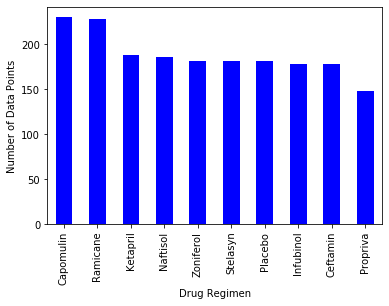

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#stacked bar chart
#clean_df.groupby(['Timepoint', 'Drug Regimen']).size().unstack().plot(kind = 'bar', stacked=True)

#Split up our data into groups based upon 'treatment regimen and timepoint'
#treatment_groups = clean_df.groupby(['Drug Regimen'])

#get mouse count by Regimen
mice_count = clean_df['Drug Regimen'].value_counts()

#treatment_groups.count().head(20)

#mouse_count_by_regimen_df = pd.DataFrame(treatment_groups['Mouse ID'].count())

#print(mouse_count_by_regimen_df)

# Chart our data, give it a title, and label the axes
treatment_group_chart = mice_count.plot(kind="bar", facecolor = "blue")
treatment_group_chart.set_xlabel("Drug Regimen")
treatment_group_chart.set_ylabel("Number of Data Points")


fig = plt.figure(figsize=(20, 10))
plt.show()

plt.tight_layout()

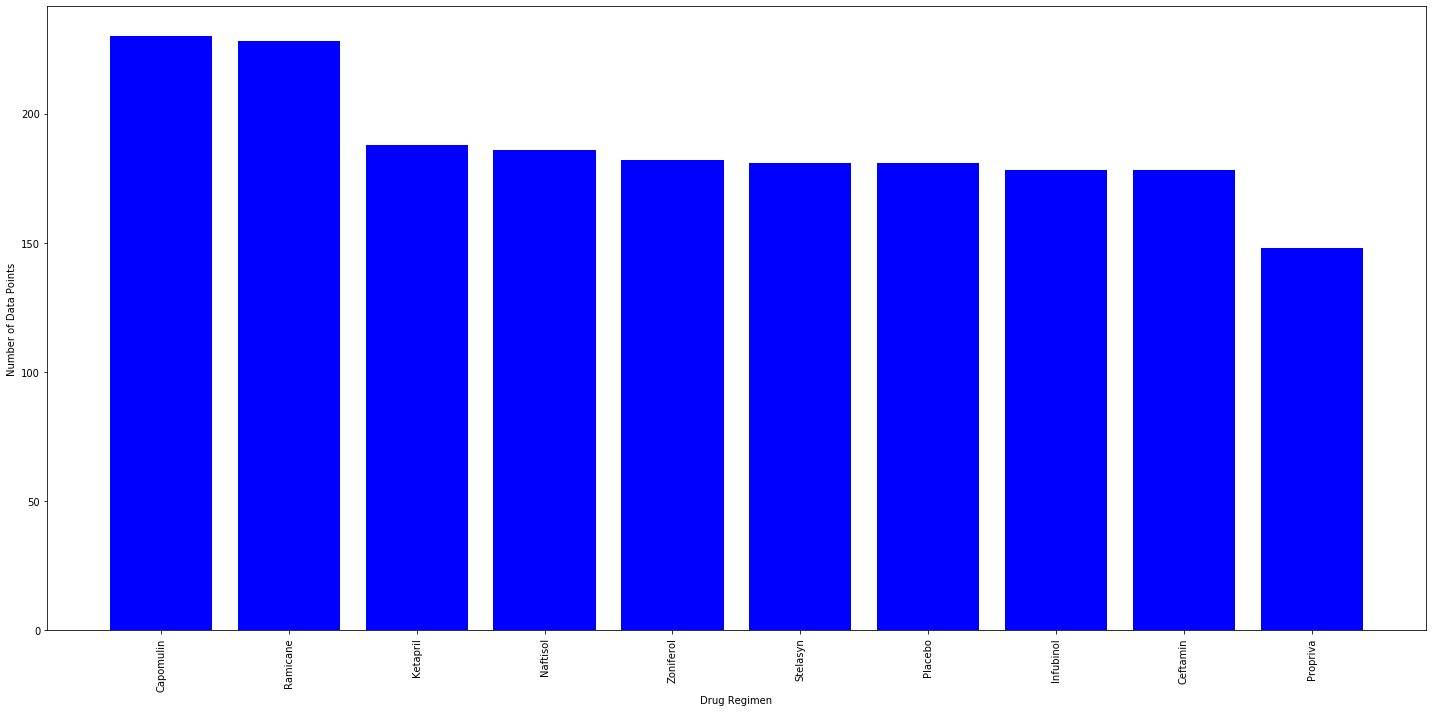

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.@

#mouse_count_by_regimen

# Set x axis and tick locations
x_axis = np.arange(0, len(mice_count))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
plt.bar(mice_count.index.values, mice_count.values, color='blue', alpha=1.0, align="edge")
plt.xticks(tick_locations, mice_count.index.values, rotation="vertical")

# Set x and y limits
#plt.xlim(-0.25, len(x_axis))
#plt.ylim(0, max(mouse_count_by_regimen_df['Mouse ID'])+10)

# Set a Title and labels
#plt.title("Number of Mice per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.tight_layout()


## Pie Plots

Male      125
Female    123
Name: Sex, dtype: int64


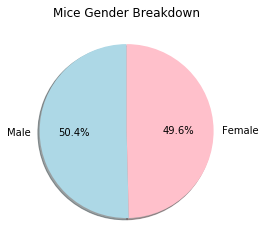

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#get rid of duplicate mouse id rows
one_row_per_mouse_df = clean_df.drop_duplicates(subset=['Mouse ID'])

#count number of mice by gender
mice_gender_counts = one_row_per_mouse_df['Sex'].value_counts()
print(mice_gender_counts)

# Create a pie chart based upon the trip duration of that single bike
mice_gender_pie = mice_gender_counts.plot(kind="pie", colors = ["lightblue", "pink"], title=("Mice Gender Breakdown"), autopct="%1.1f%%", shadow=True, startangle=90)
mice_gender_pie.set_ylabel('')

plt.show()
plt.tight_layout()



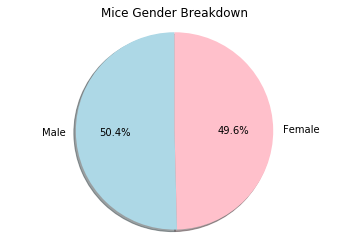

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "pink"]

plt.title("Mice Gender Breakdown")
plt.pie(mice_gender_counts, labels=mice_gender_counts.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and q



#Regimen Quartile, Outlier, Boxplot function
def tumor_volume(regimens):

    for regimen in regimens:

        regimen_df = clean_df.loc[clean_df['Drug Regimen'] == regimen]
        regimen_last_tumor_df = regimen_df.drop_duplicates(['Mouse ID'], keep='last')
        #print(regimen_last_tumor_df.nunique(axis=0))

        pd.set_option("display.max_rows", None, "display.max_columns", None)

        #print(regimen_last_tumor_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']].sort_values('Mouse ID'))

        #regimen_last_tumor_df.count()

        # If the data is in a dataframe, we use pandas to give quartile calculations
        quartiles = regimen_last_tumor_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print(f"The lower quartile of tumor volume for {regimen} is: {lowerq}")
        print(f"The upper quartile of tumor volume for {regimen} is: {upperq}")
        print(f"The interquartile range of tumor volume for {regimen} is: {iqr}")
        print(f"The median of tumor volume for {regimen} is: {quartiles[0.5]} ")

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"Values below {lower_bound} could be outliers for {regimen}.")
        print(f"Values above {upper_bound} could be outliers for {regimen}.")

        #box plot
        #fig1, ax1 = plt.subplots()
        #ax1.set_title(f'Final Tumor Volume (mm3)')
        #ax1.set_ylabel('Tumor Volume (mm3)')
        #ax1.boxplot(regimen_last_tumor_df['Tumor Volume (mm3)'])
        
    
regimens = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume(regimens)

#sns.boxplot( x=regimen_last_tumor_df['Drug Regimen'], y=regimen_last_tumor_df['Tumor Volume (mm3)'] )



#Ramicane

#Infubinol

#Ceftamin


The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
The median of tumor volume for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The lower quartile of tumor volume for Ramicane is: 31.56046955
The upper quartile of tumor volume for Ramicane is: 40.65900627
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
The median of tumor volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
The lower quartile of tumor volume for Infubinol is: 54.04860769
The upper quartile of tumor volume for Infubinol is: 65.52574285
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
The median of tumor 

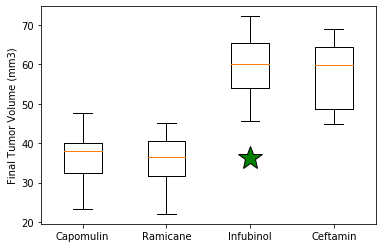

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_last_tumor_df = capomulin_df.drop_duplicates(['Mouse ID'], keep='last')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ramicane_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']
ramicane_last_tumor_df = ramicane_df.drop_duplicates(['Mouse ID'], keep='last')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
infubinol_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']
infubinol_last_tumor_df = infubinol_df.drop_duplicates(['Mouse ID'], keep='last')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ceftamin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']
ceftamine_last_tumor_df = ceftamin_df.drop_duplicates(['Mouse ID'], keep='last')


#box plot
fig1, ax1 = plt.subplots()
ax1.set_ylabel(f'Final Tumor Volume (mm3)')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
outlier_style = dict(markerfacecolor = 'green', markersize = '25', marker = '*')
ax1.boxplot([capomulin_last_tumor_df['Tumor Volume (mm3)'],
             ramicane_last_tumor_df['Tumor Volume (mm3)'],
             infubinol_last_tumor_df['Tumor Volume (mm3)'],
             ceftamine_last_tumor_df['Tumor Volume (mm3)']], flierprops = outlier_style)



plt.show()



## Line and Scatter Plots

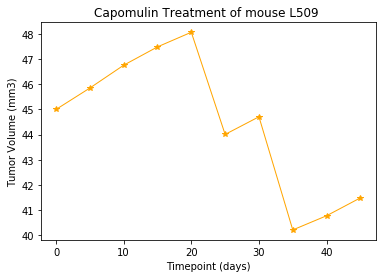

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#filter Capomulin df to just rows for a single mouse
capomulin_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']

timepoints = capomulin_mouse_df['Timepoint']
tumor_volumes = capomulin_mouse_df['Tumor Volume (mm3)']

plt.title("Capomulin Treatment of mouse L509 ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

#plt.hlines(0, 0, x_lim, alpha=0.2)
#plt.xlim(0, x_lim)
#plt.ylim(-1.25, 1.25)

# Plot the tumor values for a single mouse
plt.plot(timepoints, tumor_volumes, marker="*", color="orange", linewidth=1)
                       
# Show the chart
plt.show()



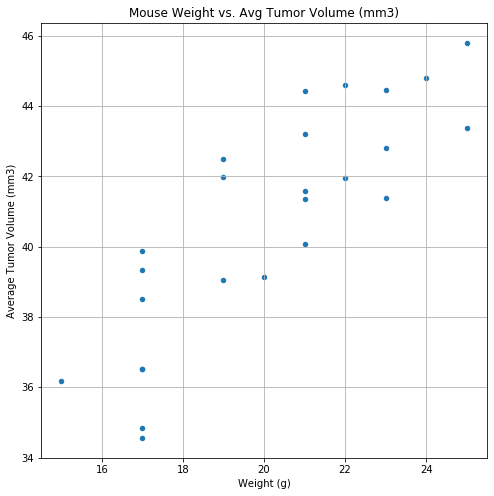

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Get the average tumor size for each mouse on the Capomulin regimen
capomulin_groupby_mouse = capomulin_df.groupby('Mouse ID')

avg_tumor_volume = capomulin_groupby_mouse["Tumor Volume (mm3)"].mean()

mouse_weight = capomulin_groupby_mouse["Weight (g)"].mean()

#create df to to hold Mouse information for the scatter plot
avg_tumor_df = pd.DataFrame({"Weight (g)": mouse_weight,
                            "Average Tumor Volume (mm3)": avg_tumor_volume})

avg_tumor_df.head(10)

# Create a scatter plot which compares MPG to horsepower
avg_tumor_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(8,8),
                  title="Mouse Weight vs. Avg Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


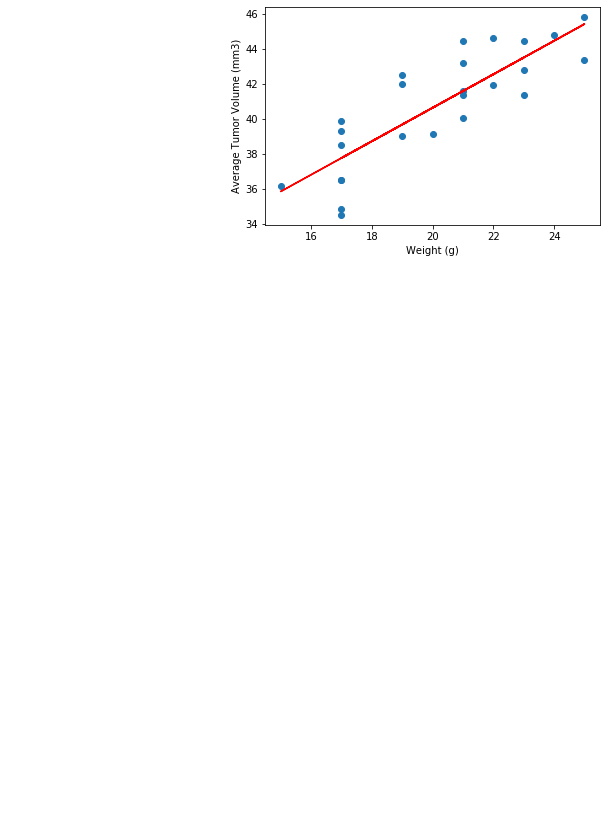

In [15]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation coefficient
correlation = st.pearsonr(avg_tumor_df['Weight (g)'], avg_tumor_df['Average Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression
x_values = avg_tumor_df['Weight (g)']
y_values = avg_tumor_df['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
